# Cervical Cancer Behavior Risk Data Set


#### Abstract: The dataset contains 19 attributes regarding ca cervix behavior risk with class label is ca_cervix with 1 and 0 as values which means the respondent with and without ca cervix, respectively.



 Attribute Information:

This dataset consist of 18 attribute (comes from 8 variables, the name of variables is the first word in each attribute)
1) behavior_eating
2) behavior_personalHygine
3) intention_aggregation
4) intention_commitment
5) attitude_consistency
6) attitude_spontaneity
7) norm_significantPerson
8) norm_fulfillment
9) perception_vulnerability
10) perception_severity
11) motivation_strength
12) motivation_willingness
13) socialSupport_emotionality
14) socialSupport_appreciation
15) socialSupport_instrumental
16) empowerment_knowledge
17) empowerment_abilities
18) empowerment_desires
19) ca_cervix (this is class attribute, 1=has cervical cancer, 0=no cervical cancer)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
data = pd.read_csv("sobar-72.csv")

In [3]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [4]:
data.shape

(72, 20)

In [5]:
data.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [6]:
#pearson_correlation = data.corr(method='pearson')
#pearson_correlation
# relation of ca_cervix column with all other columns
corr_data=data[data.columns[0:]].corr()['ca_cervix'][:]
corr_data

behavior_sexualRisk          -0.311138
behavior_eating               0.200358
behavior_personalHygine      -0.372740
intention_aggregation        -0.291717
intention_commitment         -0.237040
attitude_consistency          0.125447
attitude_spontaneity          0.084590
norm_significantPerson       -0.293836
norm_fulfillment             -0.427674
perception_vulnerability     -0.423109
perception_severity          -0.508217
motivation_strength          -0.467324
motivation_willingness       -0.428989
socialSupport_emotionality   -0.391905
socialSupport_appreciation   -0.313307
socialSupport_instrumental   -0.134555
empowerment_knowledge        -0.481814
empowerment_abilities        -0.542360
empowerment_desires          -0.458815
ca_cervix                     1.000000
Name: ca_cervix, dtype: float64

In [7]:
data['ca_cervix'].value_counts()

0    51
1    21
Name: ca_cervix, dtype: int64

means we have 51 zero's i.e. without cervical cancers and 21 one's i.e. with cervical cancers patients

In [8]:
corr_data=data[data.columns[0:]].corr()['ca_cervix'][:]
new_data=pd.DataFrame(corr_data)

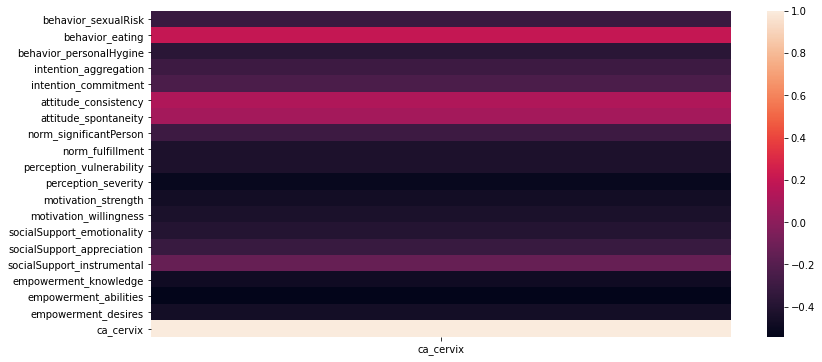

In [9]:
plt.figure(figsize=(13,6))
sns.heatmap(new_data,color="orange")
plt.show()

<Figure size 1296x576 with 0 Axes>

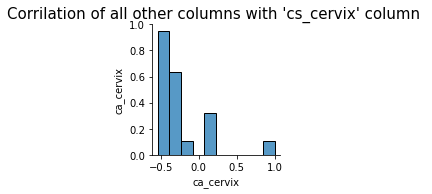

In [10]:
plt.figure(figsize=(18,8))
sns.pairplot(new_data)
plt.title("Corrilation of all other columns with 'cs_cervix' column ", fontsize=15)
plt.ylabel("All other columns")
plt.show()

here we can say that maximum columns are negatively correlated with ca_cervix column and only 3 columns are positively correlated with ca_cervix so we have to consider only these three columns for our model test. 

In [11]:
x=data.iloc[:,1:6]
y=data.iloc[:,-1]

In [13]:
x

,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency
0,13,12,4,7,9
1,11,11,10,14,7
2,15,3,2,14,8
3,11,10,10,15,7
4,11,7,8,10,7
...,...,...,...,...,...
67,14,14,10,15,6
68,12,15,10,15,8
69,8,11,6,10,6
70,12,13,10,13,6


In [14]:
y

0     1
1     1
2     1
3     1
4     1
     ..
67    0
68    0
69    0
70    0
71    0
Name: ca_cervix, Length: 72, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [16]:
# split the dataset into train test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
# create a model
model= RandomForestRegressor(n_estimators=3,min_samples_split=6,bootstrap=True,criterion='mse')
model

RandomForestRegressor(min_samples_split=6, n_estimators=3)

In [18]:
# train the decision tree model
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=6, n_estimators=3)

In [19]:
# predict using the random forest decision tree model
y_pred=model.predict(x_test)
print(y_pred)

[0.5        0.         0.51587302 0.51587302 0.41666667 0.32142857
 0.83333333 0.61666667 0.         0.57142857 0.57142857 0.73809524
 0.83333333 0.6547619  0.5        0.         0.5        0.41666667]


In [20]:
# calculate the mse(mean squared error)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mse,rmse

(0.26287159514011366, 0.5127100497748349)

### The rmse is 0.5127 it means that our model is so good 